In [1]:
## 202331279_Hania Mutia Khalisa
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Memasukan gambar

In [15]:
## 202331279_Hania Mutia Khalisa
img = cv2.imread('Hania17.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Fungsi untuk menerapkan thresholding dan menampilkan dengan histogram

In [5]:
## 202331279_Hania Mutia Khalisa
def apply_threshold_and_show(image_rgb, threshold_values, title, ax_img, ax_hist):
    """Applies multi-channel thresholding and displays the result with a histogram."""
    mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
    for color, (lower, upper) in threshold_values.items():
        lower_bound = np.array(lower, dtype=np.uint8)
        upper_bound = np.array(upper, dtype=np.uint8)
        color_mask = cv2.inRange(image_rgb, lower_bound, upper_bound)
        mask = cv2.bitwise_or(mask, color_mask)

    thresholded_img = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    ax_img.imshow(thresholded_img)
    ax_img.set_title(title)
    ax_img.axis('off')

    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        histr = cv2.calcHist([thresholded_img], [i], mask, [256], [0, 256])
        ax_hist.plot(histr, color=col)
        ax_hist.set_xlim([0, 256])
    ax_hist.set_title(f'HISTOGRAM {title}')

## Menentukan nilai ambang batas untuk kombinasi warna yang berbeda

In [7]:
## 202331279_Hania Mutia Khalisa
thresholds = {
    "NONE": {},
    "BLUE": {"BLUE": ([0, 0, 100], [100, 100, 255])},
    "RED-BLUE": {"RED": ([100, 0, 0], [255, 100, 100]), "BLUE": ([0, 0, 100], [100, 100, 255])},
    "RED-GREEN-BLUE": {"RED": ([100, 0, 0], [255, 100, 100]), "GREEN": ([0, 100, 0], [100, 255, 100]), "BLUE": ([0, 0, 100], [100, 100, 255])},
}

## Create sublpots

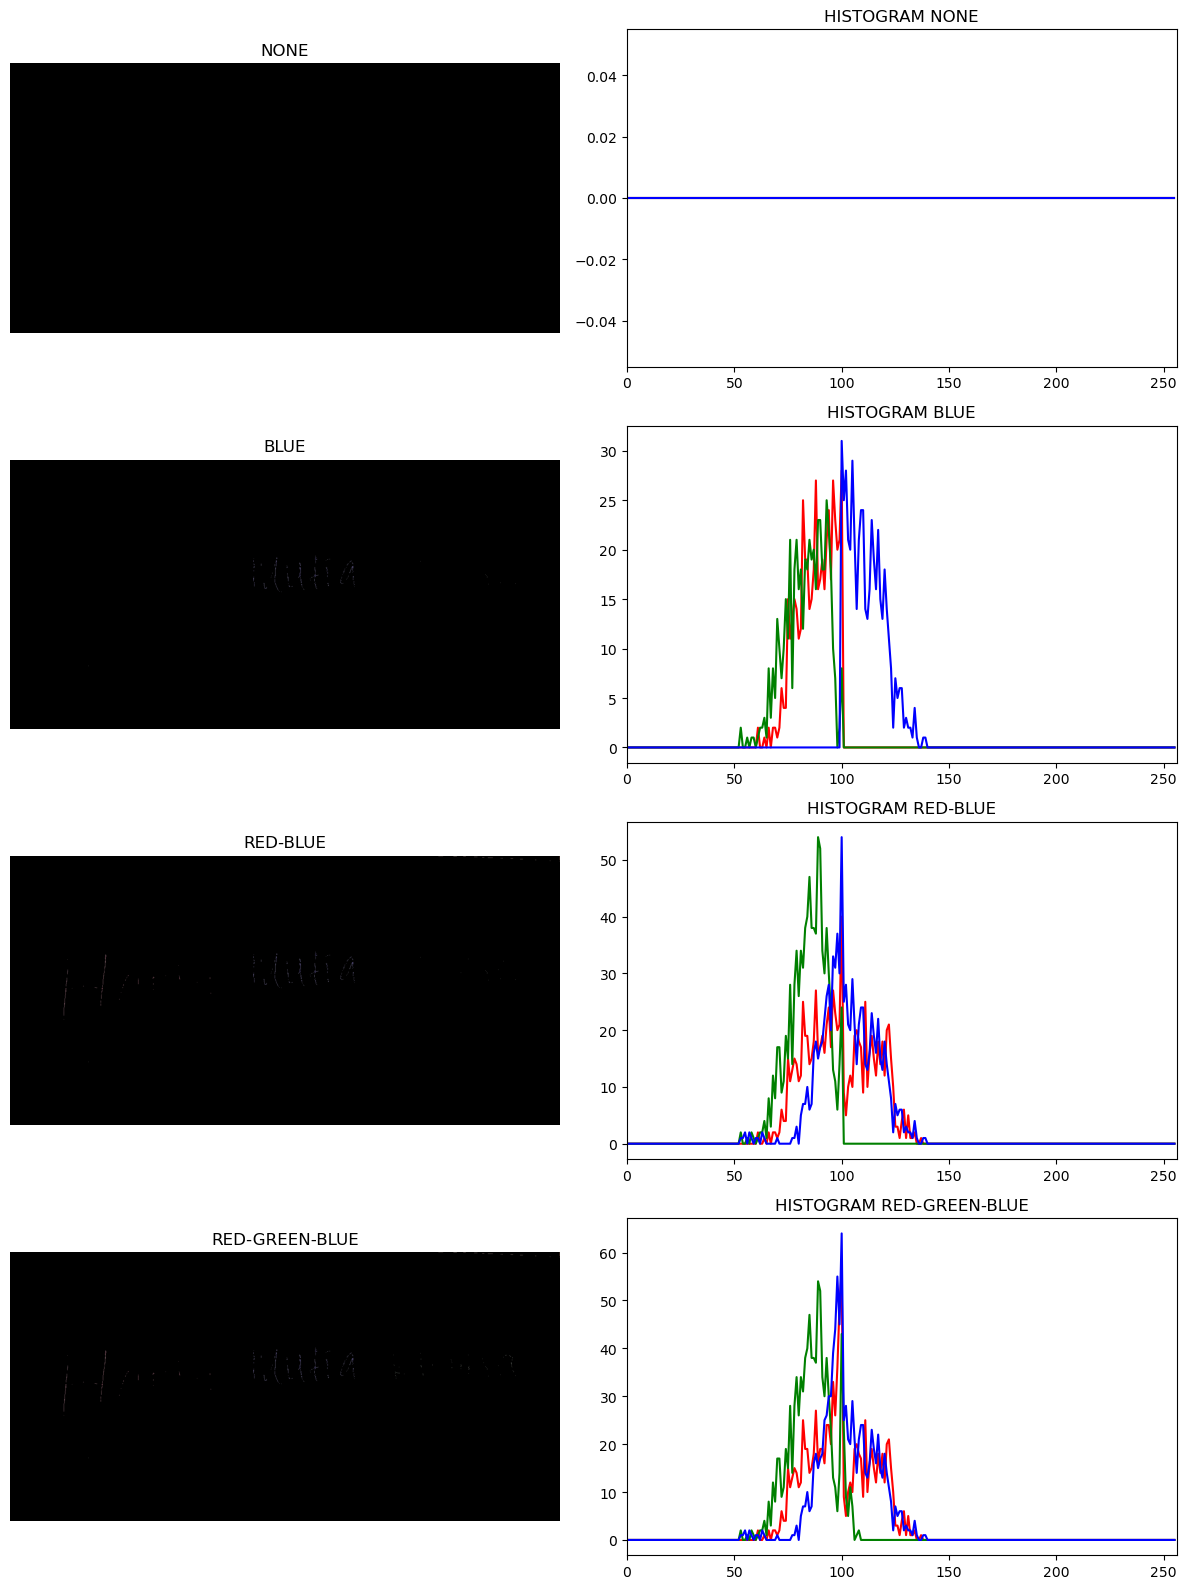

Nilai Ambang Batas (Terkecil hingga Terbesar berdasarkan kompleksitas warna):
- NONE: {}
- BLUE: {'BLUE': ([0, 0, 100], [100, 100, 255])}
- RED-BLUE: {'RED': ([100, 0, 0], [255, 100, 100]), 'BLUE': ([0, 0, 100], [100, 100, 255])}
- RED-GREEN-BLUE: {'RED': ([100, 0, 0], [255, 100, 100]), 'GREEN': ([0, 100, 0], [100, 255, 100]), 'BLUE': ([0, 0, 100], [100, 100, 255])}


In [9]:
## 202331279_Hania Mutia Khalisa
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

i = 0
for title, threshold_values in thresholds.items():
    ax_img = axes[i]
    ax_hist = axes[i + 1]
    apply_threshold_and_show(img_rgb, threshold_values, title, ax_img, ax_hist)
    i += 2

plt.tight_layout()
plt.show()

print("Nilai Ambang Batas (Terkecil hingga Terbesar berdasarkan kompleksitas warna):")
for title, threshold_values in thresholds.items():
    print(f"- {title}: {threshold_values}")